# Задача классификации изображений

Необходимо решить задачу классификации по распознаванию четырех видов блюд - Bread, Dessert, Meat, Soup. Первоначального разделения выборки на обучающую и тестовую части нет.

In [1]:
import cv2
import numpy as np
import tqdm.notebook as tq

import pickle

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchsummary

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

from model import ClassificationModel

from dataset import CustomDataset
from utils import calcAccuracy
from trainer import Trainer

## Формирование датасета

In [2]:
dataset = CustomDataset()

## Разбиение на тренировочную, тестовую и валидационную выборку<br/>с коэффициентом 0.2

In [3]:
dataset = CustomDataset()
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2)
dataset_train, dataset_val = train_test_split(dataset_train, test_size=0.2)

data_loader_train = DataLoader(dataset_train, batch_size=16, shuffle=True)
data_loader_test = DataLoader(dataset_test, batch_size=16, shuffle=True)
data_loader_val = DataLoader(dataset_val, batch_size=16, shuffle=True)

print('Train data length:', len(data_loader_train))
print('Test data length:', len(data_loader_test))
print('Validation data length:', len(data_loader_val))

Train data length: 260
Test data length: 82
Validation data length: 65


## Вывод примеров тренировочных данных

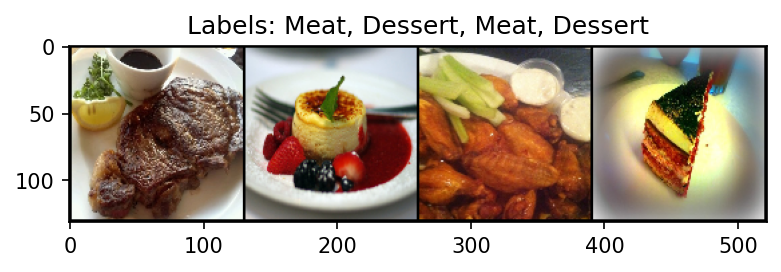

In [4]:
train_features, train_labels = next(iter(data_loader_train))
train_features = dataset.getImgsTensors(train_features)[:4]

plt.title('Labels: ' + ', '.join([dataset.getName(i) for i in train_labels[:4]]))
gridImgs = torchvision.utils.make_grid(train_features)
plt.imshow(cv2.cvtColor(gridImgs.permute(1, 2, 0).numpy() / 255, cv2.COLOR_BGR2RGB))
plt.show()

## Определение доступного устройства для обучения

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Создание модели и вывод информации о ней

In [6]:
model = ClassificationModel().to(device)
torchsummary.summary(model, (3, 128, 128))

Model created!
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 62, 62]           3,648
              ReLU-2           [-1, 48, 62, 62]               0
         MaxPool2d-3           [-1, 48, 30, 30]               0
            Conv2d-4          [-1, 128, 30, 30]         153,728
              ReLU-5          [-1, 128, 30, 30]               0
         MaxPool2d-6          [-1, 128, 14, 14]               0
            Conv2d-7          [-1, 256, 14, 14]         295,168
              ReLU-8          [-1, 256, 14, 14]               0
            Conv2d-9          [-1, 256, 14, 14]         590,080
             ReLU-10          [-1, 256, 14, 14]               0
           Conv2d-11          [-1, 128, 14, 14]         295,040
             ReLU-12          [-1, 128, 14, 14]               0
        MaxPool2d-13            [-1, 128, 6, 6]               0
           Linear-14    

## Определение класса для обучения и проверки модели 

Функция потерь - **Cross Entropy**

Оптимизатор - **SGD**:
- lerning rate = $10^{-3}$,
- momentum = 0.9;

In [7]:
trainer = Trainer(model, data_loader_train, data_loader_test, data_loader_val,
                  device, getTensorsFunc=dataset.getImgsTensors, tqdm=tq.tqdm)

## Обучение модели и подсчет ошибки для тестовой выборки

<IPython.core.display.Javascript object>


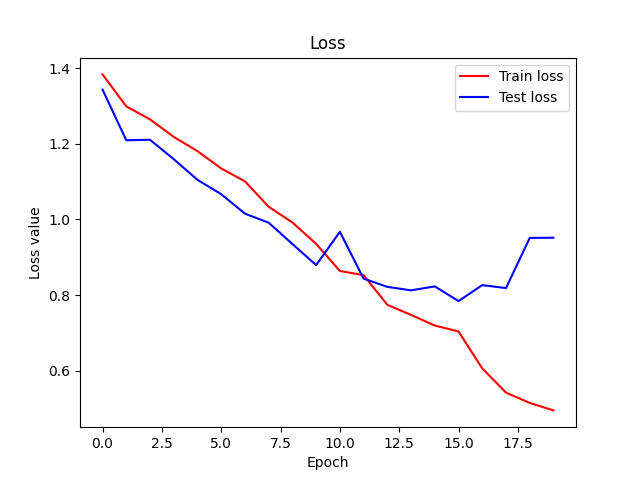

<IPython.core.display.Javascript object>


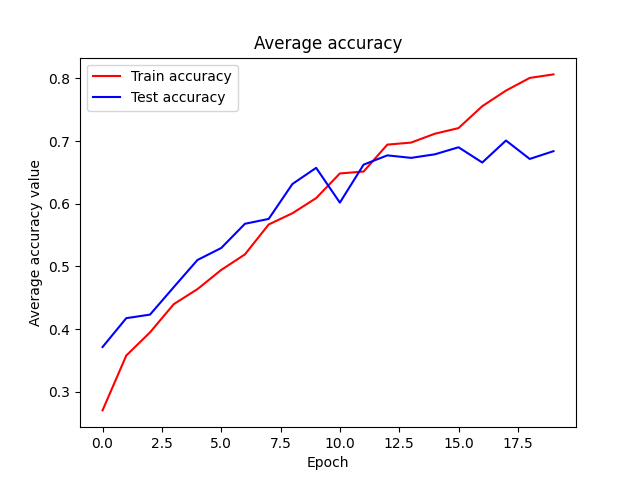

[1] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[1] Train loss: 359.6655181646 1.3833289160
[1] Train average accuracy: 0.27
[1] Train accuracy in classes:
	Bread: 0.38
	Dessert: 0.14
	Meat: 0.51
	Soup: 0.05


[1] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[1] Test loss: 110.1354781389 1.3431155871
[1] Test average accuracy: 0.37
[1] Test accuracy in classes:
	Bread: 0.91
	Dessert: 0.00
	Meat: 0.58
	Soup: 0.00
This is new best model
------------------------------


[2] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[2] Train loss: 337.6979477406 1.2988382605
[2] Train average accuracy: 0.36
[2] Train accuracy in classes:
	Bread: 0.47
	Dessert: 0.11
	Meat: 0.59
	Soup: 0.26


[2] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[2] Test loss: 99.1709750295 1.2094021345
[2] Test average accuracy: 0.42
[2] Test accuracy in classes:
	Bread: 0.84
	Dessert: 0.26
	Meat: 0.55
	Soup: 0.02
This is new best model
------------------------------


[3] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[3] Train loss: 328.7488902211 1.2644188085
[3] Train average accuracy: 0.39
[3] Train accuracy in classes:
	Bread: 0.54
	Dessert: 0.26
	Meat: 0.53
	Soup: 0.25


[3] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[3] Test loss: 99.2690631151 1.2105983307
[3] Test average accuracy: 0.42
[3] Test accuracy in classes:
	Bread: 0.66
	Dessert: 0.00
	Meat: 0.74
	Soup: 0.29
This is new best model
------------------------------


[4] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[4] Train loss: 316.7377215028 1.2182220058
[4] Train average accuracy: 0.44
[4] Train accuracy in classes:
	Bread: 0.44
	Dessert: 0.24
	Meat: 0.66
	Soup: 0.42


[4] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[4] Test loss: 95.0710435510 1.1594029701
[4] Test average accuracy: 0.47
[4] Test accuracy in classes:
	Bread: 0.08
	Dessert: 0.24
	Meat: 0.78
	Soup: 0.76
This is new best model
------------------------------


[5] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[5] Train loss: 306.9486957788 1.1805719068
[5] Train average accuracy: 0.46
[5] Train accuracy in classes:
	Bread: 0.47
	Dessert: 0.25
	Meat: 0.66
	Soup: 0.47


[5] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[5] Test loss: 90.5864422917 1.1047127109
[5] Test average accuracy: 0.51
[5] Test accuracy in classes:
	Bread: 0.41
	Dessert: 0.31
	Meat: 0.80
	Soup: 0.52
This is new best model
------------------------------


[6] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[6] Train loss: 295.0445334911 1.1347866673
[6] Train average accuracy: 0.49
[6] Train accuracy in classes:
	Bread: 0.50
	Dessert: 0.26
	Meat: 0.69
	Soup: 0.52


[6] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[6] Test loss: 87.4828755260 1.0668643357
[6] Test average accuracy: 0.53
[6] Test accuracy in classes:
	Bread: 0.40
	Dessert: 0.21
	Meat: 0.87
	Soup: 0.64
This is new best model
------------------------------


[7] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[7] Train loss: 286.2034901381 1.1007826544
[7] Train average accuracy: 0.52
[7] Train accuracy in classes:
	Bread: 0.55
	Dessert: 0.30
	Meat: 0.68
	Soup: 0.55


[7] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[7] Test loss: 83.2660846114 1.0154400562
[7] Test average accuracy: 0.57
[7] Test accuracy in classes:
	Bread: 0.26
	Dessert: 0.58
	Meat: 0.65
	Soup: 0.79
This is new best model
------------------------------


[8] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[8] Train loss: 268.7386763990 1.0336102938
[8] Train average accuracy: 0.57
[8] Train accuracy in classes:
	Bread: 0.62
	Dessert: 0.35
	Meat: 0.67
	Soup: 0.64


[8] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[8] Test loss: 81.3032847047 0.9915034720
[8] Test average accuracy: 0.58
[8] Test accuracy in classes:
	Bread: 0.67
	Dessert: 0.15
	Meat: 0.84
	Soup: 0.64
This is new best model
------------------------------


[9] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[9] Train loss: 257.9746789336 0.9922103036
[9] Train average accuracy: 0.58
[9] Train accuracy in classes:
	Bread: 0.64
	Dessert: 0.37
	Meat: 0.71
	Soup: 0.62


[9] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[9] Test loss: 76.6934505701 0.9352859826
[9] Test average accuracy: 0.63
[9] Test accuracy in classes:
	Bread: 0.50
	Dessert: 0.45
	Meat: 0.76
	Soup: 0.82
This is new best model
------------------------------


[10] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[10] Train loss: 243.2348092496 0.9355184971
[10] Train average accuracy: 0.61
[10] Train accuracy in classes:
	Bread: 0.65
	Dessert: 0.40
	Meat: 0.71
	Soup: 0.68


[10] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[10] Test loss: 72.1149300337 0.8794503663
[10] Test average accuracy: 0.66
[10] Test accuracy in classes:
	Bread: 0.85
	Dessert: 0.33
	Meat: 0.69
	Soup: 0.76
This is new best model
------------------------------


[11] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[11] Train loss: 224.6334590614 0.8639748425
[11] Train average accuracy: 0.65
[11] Train accuracy in classes:
	Bread: 0.71
	Dessert: 0.42
	Meat: 0.75
	Soup: 0.72


[11] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[11] Test loss: 79.3295823336 0.9674339309
[11] Test average accuracy: 0.60
[11] Test accuracy in classes:
	Bread: 0.81
	Dessert: 0.58
	Meat: 0.62
	Soup: 0.39
------------------------------


[12] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[12] Train loss: 221.7417465746 0.8528528714
[12] Train average accuracy: 0.65
[12] Train accuracy in classes:
	Bread: 0.72
	Dessert: 0.42
	Meat: 0.73
	Soup: 0.74


[12] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[12] Test loss: 69.1934321225 0.8438223430
[12] Test average accuracy: 0.66
[12] Test accuracy in classes:
	Bread: 0.76
	Dessert: 0.49
	Meat: 0.77
	Soup: 0.63
This is new best model
------------------------------


[13] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[13] Train loss: 201.3830219209 0.7745500843
[13] Train average accuracy: 0.69
[13] Train accuracy in classes:
	Bread: 0.75
	Dessert: 0.50
	Meat: 0.75
	Soup: 0.77


[13] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[13] Test loss: 67.4048731923 0.8220106487
[13] Test average accuracy: 0.68
[13] Test accuracy in classes:
	Bread: 0.79
	Dessert: 0.22
	Meat: 0.81
	Soup: 0.89
This is new best model
------------------------------


[14] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[14] Train loss: 194.4177342653 0.7477605164
[14] Train average accuracy: 0.70
[14] Train accuracy in classes:
	Bread: 0.73
	Dessert: 0.50
	Meat: 0.78
	Soup: 0.79


[14] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[14] Test loss: 66.6477375925 0.8127772877
[14] Test average accuracy: 0.67
[14] Test accuracy in classes:
	Bread: 0.87
	Dessert: 0.46
	Meat: 0.70
	Soup: 0.66
------------------------------


[15] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[15] Train loss: 187.1574412882 0.7198363126
[15] Train average accuracy: 0.71
[15] Train accuracy in classes:
	Bread: 0.76
	Dessert: 0.51
	Meat: 0.78
	Soup: 0.79


[15] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[15] Test loss: 67.5000912547 0.8231718446
[15] Test average accuracy: 0.68
[15] Test accuracy in classes:
	Bread: 0.66
	Dessert: 0.51
	Meat: 0.82
	Soup: 0.73
This is new best model
------------------------------


[16] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[16] Train loss: 183.0616745651 0.7040833637
[16] Train average accuracy: 0.72
[16] Train accuracy in classes:
	Bread: 0.76
	Dessert: 0.54
	Meat: 0.78
	Soup: 0.81


[16] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[16] Test loss: 64.3152301610 0.7843320751
[16] Test average accuracy: 0.69
[16] Test accuracy in classes:
	Bread: 0.67
	Dessert: 0.46
	Meat: 0.88
	Soup: 0.76
This is new best model
------------------------------


[17] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[17] Train loss: 157.6648240387 0.6064031694
[17] Train average accuracy: 0.76
[17] Train accuracy in classes:
	Bread: 0.78
	Dessert: 0.59
	Meat: 0.81
	Soup: 0.85


[17] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[17] Test loss: 67.7798791099 0.8265838916
[17] Test average accuracy: 0.67
[17] Test accuracy in classes:
	Bread: 0.75
	Dessert: 0.22
	Meat: 0.89
	Soup: 0.80
------------------------------


[18] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[18] Train loss: 141.0815659240 0.5426214074
[18] Train average accuracy: 0.78
[18] Train accuracy in classes:
	Bread: 0.81
	Dessert: 0.63
	Meat: 0.82
	Soup: 0.86


[18] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[18] Test loss: 67.1344059305 0.8187122674
[18] Test average accuracy: 0.70
[18] Test accuracy in classes:
	Bread: 0.76
	Dessert: 0.41
	Meat: 0.81
	Soup: 0.82
This is new best model
------------------------------


[19] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[19] Train loss: 133.9718911350 0.5152765044
[19] Train average accuracy: 0.80
[19] Train accuracy in classes:
	Bread: 0.82
	Dessert: 0.67
	Meat: 0.85
	Soup: 0.86


[19] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[19] Test loss: 78.0092714280 0.9513325784
[19] Test average accuracy: 0.67
[19] Test accuracy in classes:
	Bread: 0.79
	Dessert: 0.24
	Meat: 0.78
	Soup: 0.87
------------------------------


[20] Training batches:   0%|          | 0/260 [00:00<?, ?it/s]

[20] Train loss: 128.8429093957 0.4955496515
[20] Train average accuracy: 0.81
[20] Train accuracy in classes:
	Bread: 0.82
	Dessert: 0.67
	Meat: 0.84
	Soup: 0.89


[20] Testing batches:   0%|          | 0/82 [00:00<?, ?it/s]

[20] Test loss: 78.0445567369 0.9517628870
[20] Test average accuracy: 0.68
[20] Test accuracy in classes:
	Bread: 0.92
	Dessert: 0.35
	Meat: 0.73
	Soup: 0.74
------------------------------
Тренировка завершена, наилучшая средняя точность: 0.7008895744339545


In [8]:
%matplotlib notebook

axis = [None, None]

fig1, axis[0] = plt.subplots(1, 1)
fig2, axis[1] = plt.subplots(1, 1)

graph_epochs = []
graph_train_loss = []
graph_test_loss = []

graph_train_accuracy = []
graph_test_accuracy = []

axis[0].relim() 
axis[0].autoscale_view(True,True,True)
axis[0].set_title('Loss')
axis[0].set_ylabel('Loss value')
axis[0].set_xlabel('Epoch')

axis[1].relim() 
axis[1].autoscale_view(True,True,True)
axis[1].set_title('Average accuracy')
axis[1].set_ylabel('Average accuracy value')
axis[1].set_xlabel('Epoch')

plt.show(block=False)

best_loss = np.inf
best_accuracy = 0.0

for epoch in range(20): 
    train_loss, accuracyDict = trainer.train(epoch + 1)

    print('[%d] Train loss: %.10f %.10f' % (epoch + 1, train_loss, train_loss / len(data_loader_train)))
    
    train_accuracy = sum([accuracyDict[i] for i in accuracyDict.keys()]) / len(accuracyDict.keys())
    print('[%d] Train average accuracy: %.2f' % (epoch + 1, train_accuracy))
    
    print('[%d] Train accuracy in classes:' % (epoch + 1))
    print(*[f'\t{dataset.getName(i)}: {accuracyDict[i]:.2f}' for i in accuracyDict.keys()], sep='\n')

    ################################################
    
    test_loss, accuracyDict = trainer.test(epoch + 1)

    print('[%d] Test loss: %.10f %.10f' % (epoch + 1, test_loss, test_loss / len(data_loader_test)))
    
    test_accuracy = sum([accuracyDict[i] for i in accuracyDict.keys()]) / len(accuracyDict.keys())
    print('[%d] Test average accuracy: %.2f' % (epoch + 1, test_accuracy))
    
    print('[%d] Test accuracy in classes:' % (epoch + 1))
    print(*[f'\t{dataset.getName(i)}: {accuracyDict[i]:.2f}' for i in accuracyDict.keys()], sep='\n')
    
    ################################################

    if best_accuracy < test_accuracy:
        print('This is new best model')
        best_accuracy = test_accuracy
        best_model = pickle.loads(pickle.dumps(model))
    
    ################################################
    
    print(30 * '-')
    
    graph_epochs.append(epoch)
    graph_train_loss.append(train_loss / len(data_loader_train))
    graph_test_loss.append(test_loss / len(data_loader_test))
    
    graph_test_accuracy.append(test_accuracy)    
    graph_train_accuracy.append(train_accuracy)
    
    for artist in fig1.gca().lines + fig1.gca().collections + fig2.gca().lines + fig2.gca().collections:
        artist.remove()
        
    axis[0].plot(graph_epochs, graph_train_loss, color='r', label='Train loss')
    axis[0].plot(graph_epochs, graph_test_loss, color='b', label='Test loss')
    axis[0].legend()
    fig1.canvas.draw()
    
    axis[1].plot(graph_epochs, graph_train_accuracy, color='r', label='Train accuracy')
    axis[1].plot(graph_epochs, graph_test_accuracy, color='b', label='Test accuracy')
    axis[1].legend()
    fig2.canvas.draw()

print('Тренировка завершена, наилучшая средняя точность:', best_accuracy)

## Сохранение наилучшей модели

In [9]:
torch.save(best_model, 'models/trainedModel.pt')

## Загрузка наилучшей модели

In [10]:
best_model = torch.load('models/trainedModel.pt')

## Точность классификации и ошибка наилучшей модели по классам<br/>на валидационной выборке

In [11]:
accuracyDict = trainer.validation(best_model)
   
test_accuracy = sum([accuracyDict[i] for i in accuracyDict.keys()]) / len(accuracyDict.keys())
print('Validation average accuracy: %.2f' % (test_accuracy))
print('Accuracy in classes:')
print(*[f'\t{dataset.getName(i)}: {accuracyDict[i]:.2f}' for i in accuracyDict.keys()], sep='\n')

Batches:   0%|          | 0/65 [00:00<?, ?it/s]

Validation average accuracy: 0.68
Accuracy in classes:
	Bread: 0.73
	Dessert: 0.41
	Meat: 0.81
	Soup: 0.77


## Проверка наилучшей модели по картинкам

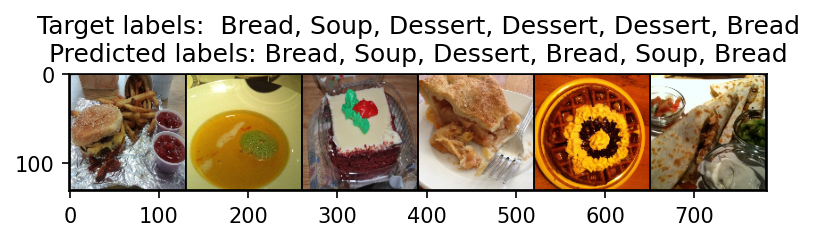

In [14]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

test_features, test_labels = next(iter(data_loader_val))
test_labels = test_labels.to(device)
test_features = dataset.getImgsTensors(test_features).to(device)

outputs = best_model(test_features)
outputs = torch.max(outputs, 1)[1]

plt.title('Target labels:  ' + ', '.join([dataset.getName(i) for i in test_labels[:6]]) + \
          '\nPredicted labels: ' + ', '.join([dataset.getName(i) for i in outputs[:6]]))
gridImgs = torchvision.utils.make_grid(test_features[:6]).cpu()
plt.imshow(cv2.cvtColor(gridImgs.permute(1, 2, 0).numpy() / 255, cv2.COLOR_BGR2RGB))
plt.show()